In [ ]:
# NIM : 17.01.53.0037
# Nama : Ahmad Samsul Muarif

In [1]:
# Mengimport library yang akan digunakan
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Mengimport library KMeans untuk proses klastering
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
# Memasukan data berupa file xlsx
data = pd.read_excel("../input/uasdata1/uas-data-1.xlsx")

# Menampilkan data yang sudah di inputkan
print(f"head: \n{data.head(5)}\n")
print(f"Tail: \n {data.tail()} \n")
print(f"Describe data: \n{data.describe()}\n")
print(f"Info: \n{data.info()}\n")

head: 
         Provinsi    2020    2019    2018  2020.1  2019.1  2018.1   2020.2  \
0            ACEH  2691.8  2656.1  2619.9  2696.3  2660.2  2623.5   5388.1   
1  SUMATERA UTARA  7392.7  7312.2  7229.4  7405.7  7327.2  7246.5  14798.4   
2  SUMATERA BARAT  2760.6  2727.0  2692.6  2785.1  2752.5  2719.3   5545.7   
3            RIAU  3553.2  3497.0  3440.0  3398.0  3338.1  3277.6   6951.2   
4           JAMBI  1831.3  1813.5  1795.2  1772.9  1752.7  1731.9   3604.2   

    2019.2   2018.2  
0   5316.3   5243.4  
1  14639.4  14476.0  
2   5479.5   5411.8  
3   6835.1   6717.6  
4   3566.2   3527.1  

Tail: 
           Provinsi    2020    2019    2018  2020.1  2019.1  2018.1  2020.2  \
29  SULAWESI BARAT   692.2   682.8   673.3   686.0   676.4   666.8  1378.1   
30          MALUKU   900.4   891.4   882.2   886.7   877.1   867.3  1787.1   
31    MALUKU UTARA   637.3   629.3   621.2   615.0   606.3   597.5  1252.3   
32     PAPUA BARAT   518.1   506.4   494.9   468.0   457.2   446.5   98

In [3]:
# Mengambil beberapa data untuk di lakukan klastering nantinya
data_x = data.iloc[:, 1:7]
data_x.head()

,2020,2019,2018,2020.1,2019.1,2018.1
0,2691.8,2656.1,2619.9,2696.3,2660.2,2623.5
1,7392.7,7312.2,7229.4,7405.7,7327.2,7246.5
2,2760.6,2727.0,2692.6,2785.1,2752.5,2719.3
3,3553.2,3497.0,3440.0,3398.0,3338.1,3277.6
4,1831.3,1813.5,1795.2,1772.9,1752.7,1731.9


In [4]:
scr=[]

for i in range (1, 35):
    score = KMeans(n_clusters=i).fit(data_x).score(data_x)
    print(score)
    scr.append(score)

-6172795600.199117
-714731770.2363442
-314183676.7469047
-171959937.15523815
-97643389.2876923
-53607495.24169231
-33351370.006692305
-19331005.455888886
-13795110.19523809
-9677143.626904758
-6824102.089749998
-3814922.844238095
-2700292.6598333325
-1747973.2214999998
-1293782.0948333328
-1052951.2831666663
-900717.8216666664
-603561.7133333333
-489956.6833333333
-342911.1533333333
-278621.7483333333
-224594.23833333328
-164765.63833333328
-129487.24333333329
-98123.40833333328
-71349.47833333332
-50042.81999999999
-33785.28499999997
-26043.01499999997
-18527.579999999958
-11033.439999999957
-8017.929999999954
-3631.3500000000145
-2.116419145399348e-24


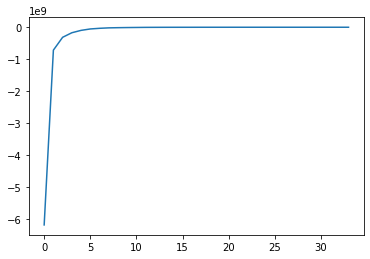

In [5]:
plt.plot(scr)

In [6]:
# Proses klastering menggunakan Algoritma Kmeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(data_x)

KMeans(n_clusters=5)

In [7]:
# Menambah kolom klastering dengan nama Cluster
data_x["Cluster"] = kmeans.labels_
data_x

,2020,2019,2018,2020.1,2019.1,2018.1,Cluster
0,2691.8,2656.1,2619.9,2696.3,2660.2,2623.5,0
1,7392.7,7312.2,7229.4,7405.7,7327.2,7246.5,2
2,2760.6,2727.0,2692.6,2785.1,2752.5,2719.3,0
3,3553.2,3497.0,3440.0,3398.0,3338.1,3277.6,0
4,1831.3,1813.5,1795.2,1772.9,1752.7,1731.9,0
5,4358.0,4308.1,4257.1,4242.8,4189.1,4134.4,2
6,1015.2,1004.5,993.6,979.1,967.2,955.0,4
7,4364.3,4327.8,4289.9,4170.6,4129.8,4087.8,2
8,756.9,748.5,739.9,712.9,702.6,692.1,4
9,1179.0,1144.7,1111.0,1130.5,1096.9,1063.8,4


(array([12.,  0.,  2.,  0.,  0.,  6.,  0.,  1.,  0., 13.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

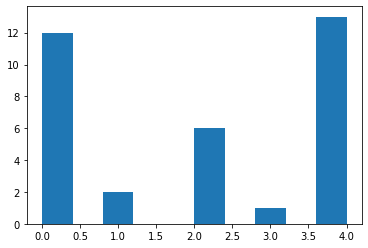

In [8]:
# Visualisasi pembagian hasil klastering
plt.hist(data_x["Cluster"])

In [ ]:
# Visualisasi pengelompokan cluster dengan seaborn
sns.pairplot(data_x, hue="Cluster")